### get movies data into shape for initial regressoion  

Variables for analysis:



In [104]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

movies = pd.read_pickle('movies_all_stars.pkl')
movies.set_index(['movie_title'])
movies.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4810 entries, 0 to 4809
Data columns (total 41 columns):
color                        4794 non-null object
director_name                4740 non-null object
num_critic_for_reviews       4766 non-null float64
duration                     4799 non-null float64
director_facebook_likes      4740 non-null float64
actor_3_facebook_likes       4794 non-null float64
actor_2_name                 4810 non-null object
actor_1_facebook_likes       4804 non-null float64
gross                        4022 non-null float64
genres                       4810 non-null object
actor_1_name                 4810 non-null object
movie_title                  4810 non-null object
num_voted_users              4810 non-null int64
cast_total_facebook_likes    4810 non-null int64
actor_3_name                 4810 non-null object
facenumber_in_poster         4801 non-null float64
plot_keywords                4677 non-null object
movie_imdb_link              4810 non-

In [105]:
sum(az['WorldwideGross_y']== 0)

0

In [106]:
az = movies[movies['title_year'] >= 2000]
az = az[az['WorldwideGross_y'] > 0]
az['WorldwideGross_y'].describe()

count    3.182000e+03
mean     1.104116e+08
std      1.936188e+08
min      4.230000e+02
25%      8.556206e+06
50%      4.174472e+07
75%      1.184714e+08
max      2.783919e+09
Name: WorldwideGross_y, dtype: float64

In [107]:
az = az[['color','duration','title_year','ProductionBudget_y',  'WorldwideGross_y','content_rating','num_stars']]
az.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3182 entries, 0 to 4807
Data columns (total 7 columns):
color                 3179 non-null object
duration              3175 non-null float64
title_year            3182 non-null float64
ProductionBudget_y    3182 non-null int64
WorldwideGross_y      3182 non-null int64
content_rating        3096 non-null object
num_stars             3182 non-null int64
dtypes: float64(2), int64(3), object(2)
memory usage: 198.9+ KB


In [108]:
az['rate_of_return'] = az['WorldwideGross_y']/az['ProductionBudget_y']
az['ln_rate_of_return'] = np.log(az['rate_of_return'])
az.info()
##az.to_pickle('az.pkl')

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3182 entries, 0 to 4807
Data columns (total 9 columns):
color                 3179 non-null object
duration              3175 non-null float64
title_year            3182 non-null float64
ProductionBudget_y    3182 non-null int64
WorldwideGross_y      3182 non-null int64
content_rating        3096 non-null object
num_stars             3182 non-null int64
rate_of_return        3182 non-null float64
ln_rate_of_return     3182 non-null float64
dtypes: float64(4), int64(3), object(2)
memory usage: 248.6+ KB


In [109]:
az = pd.get_dummies(az,prefix = 'dum')
az.duration=az.duration.fillna(az.duration.mean())

In [110]:
az.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3182 entries, 0 to 4807
Data columns (total 16 columns):
duration                3182 non-null float64
title_year              3182 non-null float64
ProductionBudget_y      3182 non-null int64
WorldwideGross_y        3182 non-null int64
num_stars               3182 non-null int64
rate_of_return          3182 non-null float64
ln_rate_of_return       3182 non-null float64
dum_ Black and White    3182 non-null float64
dum_Color               3182 non-null float64
dum_G                   3182 non-null float64
dum_NC-17               3182 non-null float64
dum_Not Rated           3182 non-null float64
dum_PG                  3182 non-null float64
dum_PG-13               3182 non-null float64
dum_R                   3182 non-null float64
dum_Unrated             3182 non-null float64
dtypes: float64(13), int64(3)
memory usage: 422.6 KB


### Below we are working with the actual predictors matrix, X instead of the entire data frame 

In [111]:
X = az.drop(['WorldwideGross_y','ln_rate_of_return','rate_of_return','ProductionBudget_y'], axis=1)
X['Intercept'] = np.ones(len(X))

In [112]:
for i in X.columns:
    print (i, (X[i].isnull().sum())/len(X))

duration 0.0
title_year 0.0
num_stars 0.0
dum_ Black and White 0.0
dum_Color 0.0
dum_G 0.0
dum_NC-17 0.0
dum_Not Rated 0.0
dum_PG 0.0
dum_PG-13 0.0
dum_R 0.0
dum_Unrated 0.0
Intercept 0.0


In [113]:
X.duration=X.duration.fillna(X.duration.mean())



In [114]:
az.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3182 entries, 0 to 4807
Data columns (total 16 columns):
duration                3182 non-null float64
title_year              3182 non-null float64
ProductionBudget_y      3182 non-null int64
WorldwideGross_y        3182 non-null int64
num_stars               3182 non-null int64
rate_of_return          3182 non-null float64
ln_rate_of_return       3182 non-null float64
dum_ Black and White    3182 non-null float64
dum_Color               3182 non-null float64
dum_G                   3182 non-null float64
dum_NC-17               3182 non-null float64
dum_Not Rated           3182 non-null float64
dum_PG                  3182 non-null float64
dum_PG-13               3182 non-null float64
dum_R                   3182 non-null float64
dum_Unrated             3182 non-null float64
dtypes: float64(13), int64(3)
memory usage: 422.6 KB


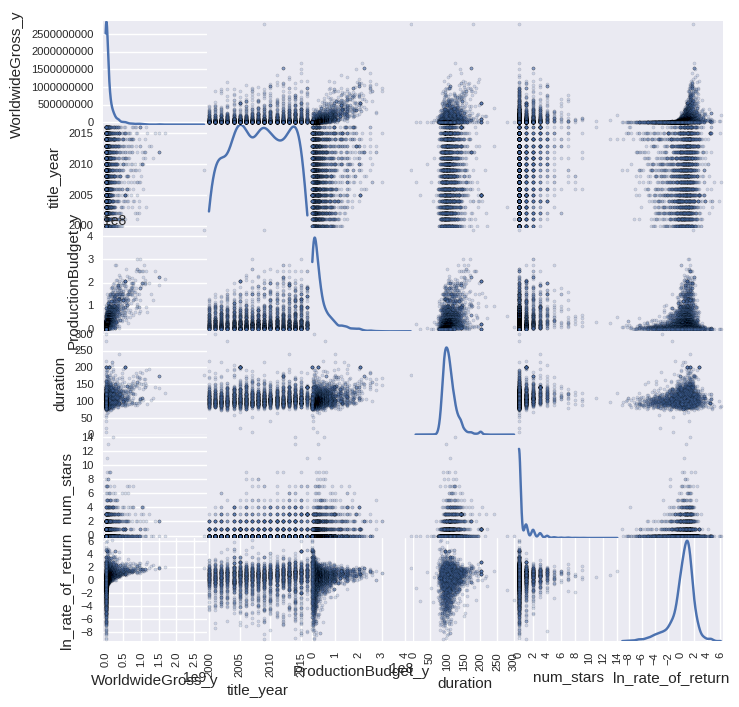

In [115]:
from pandas.tools.plotting import scatter_matrix

scatter_matrix(az[['WorldwideGross_y','title_year','ProductionBudget_y','duration','num_stars','ln_rate_of_return']],
               alpha=0.2, figsize=(8, 8), diagonal='kde');

In [116]:
y = az['WorldwideGross_y']
print(y.isnull().sum())
y.describe()

0


count    3.182000e+03
mean     1.104116e+08
std      1.936188e+08
min      4.230000e+02
25%      8.556206e+06
50%      4.174472e+07
75%      1.184714e+08
max      2.783919e+09
Name: WorldwideGross_y, dtype: float64

In [117]:
#rate_of_return = az['WorldwideGross_y'] / az['ProductionBudget_y']
y2 = az['ln_rate_of_return']
y2.describe()
#plt.hist(np.log(rate_of_return));

count    3182.000000
mean        0.261588
std         1.798859
min        -8.983567
25%        -0.331244
50%         0.617248
75%         1.306912
max         6.067309
Name: ln_rate_of_return, dtype: float64

In [119]:
X2 = X.drop(['dum_Unrated','dum_Color'],axis=1)
X2.describe()

,duration,title_year,num_stars,dum_ Black and White,dum_G,dum_NC-17,dum_Not Rated,dum_PG,dum_PG-13,dum_R,Intercept
count,3182.000000,3182.000000,3182.000000,3182.000000,3182.000000,3182.000000,3182.000000,3182.000000,3182.000000,3182.000000,3182.0
mean,108.800630,2008.086738,0.553740,0.024513,0.015085,0.000943,0.017913,0.134192,0.386549,0.411062,1.0
std,21.492465,4.708079,1.231759,0.154659,0.121910,0.030695,0.132657,0.340912,0.487035,0.492104,0.0
min,7.000000,2000.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0
25%,95.000000,2004.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0
50%,105.000000,2008.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0
75%,118.000000,2012.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.0
max,300.000000,2016.000000,14.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.0


In [120]:
#X2.to_pickle('X.pkl')
#y2.to_pickle('y.pkl')

In [121]:
from sklearn import cross_validation, datasets
from sklearn import linear_model

In [122]:
X_train, X_test, y_train, y_test = cross_validation.train_test_split(
                                        X2, y2, test_size=0.3)

In [123]:
models = {}
models['lin_reg'] = linear_model.LinearRegression()
models['ridge'] = linear_model.Ridge()
models['lasso'] = linear_model.Lasso(alpha=.2)
models['elasticnet'] = linear_model.ElasticNet()

In [124]:

for name,model in models.items():
    model.fit(X_train,y_train)
    print('Model: '+name)
    print("Score: " + str(model.score(X_test,y_test)))
    sorted_features = sorted(zip(X2.columns,model.coef_), key=lambda tup: abs(tup[1]), reverse=True)
    for feature in sorted_features:
        print(feature)
        
    print("")

Model: lin_reg
Score: 0.102105610999
('dum_G', 2.7414351213764561)
('dum_PG', 2.3761983326149778)
('dum_PG-13', 2.171706249027904)
('dum_NC-17', 1.999297007292173)
('dum_R', 1.6878432574962845)
('dum_Not Rated', 0.20879915373975916)
('dum_ Black and White', -0.14663349387290608)
('duration', 0.0093318739144661912)
('title_year', 0.0087848617158131845)
('num_stars', 0.0014030151777648131)
('Intercept', 0.0)

Model: ridge
Score: 0.100657593382
('dum_G', 2.5495069938659549)
('dum_PG', 2.2413411922326252)
('dum_PG-13', 2.0419398763681298)
('dum_R', 1.558793824953312)
('dum_NC-17', 1.4024112613085784)
('dum_ Black and White', -0.14066670276711757)
('dum_Not Rated', 0.080797538182054235)
('duration', 0.0093106425936785656)
('title_year', 0.0084546634136071566)
('num_stars', 0.002922857598965821)
('Intercept', 0.0)

Model: elasticnet
Score: 0.0193570771577
('duration', 0.0094476867962847415)
('title_year', 0.0)
('num_stars', 0.0)
('dum_ Black and White', -0.0)
('dum_G', 0.0)
('dum_NC-17', 0.0

In [125]:

import statsmodels.formula.api as sm


In [126]:
model = sm.OLS(y_train,X_train )
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      ln_rate_of_return   R-squared:                       0.103
Model:                            OLS   Adj. R-squared:                  0.099
Method:                 Least Squares   F-statistic:                     25.42
Date:                Thu, 06 Oct 2016   Prob (F-statistic):           4.10e-46
Time:                        17:32:23   Log-Likelihood:                -4332.2
No. Observations:                2227   AIC:                             8686.
Df Residuals:                    2216   BIC:                             8749.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [95.0% Conf. Int.]
----------------------------------------------------------------------------------------
duration                 0.0093      0.002      5.390      0.000         0.006     0.013
title_year               0.0088      0.008      1.123      0.261        -0.007     0.024
num_stars                0.0014      0.031      0.045      0.964        -0.060     0.063
dum_ Black and White    -0.1466      0.230     -0.637      0.524        -0.598     0.305
dum_G                    2.7414      0.332      8.259      0.000         2.090     3.392
dum_NC-17                1.9993      1.001      1.997      0.046         0.036     3.962
dum_Not Rated            0.2088      0.316      0.661      0.508        -0.410     0.828
dum_PG                   2.3762      0.217     10.958      0.000         1.951     2.801
dum_PG-13                2.1717      0.203     10.724      0.000         1.775     2.569
dum_R                    1.6878      0.201      8.395      0.000         1.294     2.082
Intercept              -20.2722     15.714     -1.290      0.197       -51.087    10.543
==============================================================================
Omnibus:                      508.887   Durbin-Watson:                   2.043
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1629.279
Skew:                          -1.137   Prob(JB):                         0.00
Kurtosis:                       6.519   Cond. No.                     8.79e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.79e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [127]:
len(results.predict())

2227

In [129]:
X_train2 = X_train.drop(['num_stars','dum_ Black and White', 'dum_NC-17','dum_Not Rated','title_year'],axis=1)

In [130]:
model = sm.OLS(y_train,X_train2)
results2 = model.fit()
results2.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      ln_rate_of_return   R-squared:                       0.101
Model:                            OLS   Adj. R-squared:                  0.099
Method:                 Least Squares   F-statistic:                     49.65
Date:                Thu, 06 Oct 2016   Prob (F-statistic):           7.09e-49
Time:                        17:33:40   Log-Likelihood:                -4335.1
No. Observations:                2227   AIC:                             8682.
Df Residuals:                    2221   BIC:                             8717.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
duration       0.0093      0.002      5.441      0.000         0.006     0.013
dum_G          2.5971      0.308      8.427      0.000         1.993     3.202
dum_PG         2.2538      0.181     12.478      0.000         1.900     2.608
dum_PG-13      2.0483      0.163     12.604      0.000         1.730     2.367
dum_R          1.5591      0.161      9.678      0.000         1.243     1.875
Intercept     -2.5009      0.231    -10.834      0.000        -2.954    -2.048
==============================================================================
Omnibus:                      500.353   Durbin-Watson:                   2.038
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1570.445
Skew:                          -1.125   Prob(JB):                         0.00
Kurtosis:                       6.444   Cond. No.                     1.18e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.18e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [131]:
final = X_train2.copy()
final['predicted'] = results2.predict()
final['predicted_effect'] = np.exp(final['predicted'])
final.describe()

,duration,dum_G,dum_PG,dum_PG-13,dum_R,Intercept,predicted,predicted_effect
count,2227.000000,2227.000000,2227.000000,2227.000000,2227.000000,2227.0,2227.000000,2227.000000
mean,109.081277,0.017961,0.130220,0.388864,0.405927,1.0,0.279143,1.495130
std,21.749260,0.132841,0.336621,0.487602,0.491181,0.0,0.566828,0.652650
min,7.000000,0.000000,0.000000,0.000000,0.000000,1.0,-2.436090,0.087502
25%,95.000000,0.000000,0.000000,0.000000,0.000000,1.0,0.021624,1.021859
50%,105.000000,0.000000,0.000000,0.000000,0.000000,1.0,0.408936,1.505215
75%,118.000000,0.000000,0.000000,1.000000,1.000000,1.0,0.623739,1.865891
max,300.000000,1.000000,1.000000,1.000000,1.000000,1.0,1.837411,6.280255


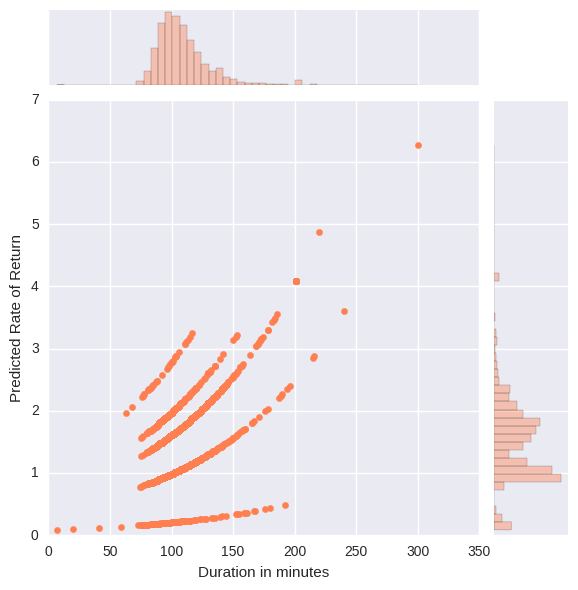

In [140]:
(sns.jointplot(x="duration", y='predicted_effect', data=final,color='coral', stat_func=None)
.set_axis_labels('Duration in minutes', 'Predicted Rate of Return'));

In [133]:
model = sm.OLS(y_test,X_test )
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      ln_rate_of_return   R-squared:                       0.109
Model:                            OLS   Adj. R-squared:                  0.100
Method:                 Least Squares   F-statistic:                     12.82
Date:                Thu, 06 Oct 2016   Prob (F-statistic):           2.04e-19
Time:                        17:36:57   Log-Likelihood:                -1874.1
No. Observations:                 955   AIC:                             3768.
Df Residuals:                     945   BIC:                             3817.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [95.0% Conf. Int.]
----------------------------------------------------------------------------------------
duration                 0.0118      0.003      4.136      0.000         0.006     0.017
title_year               0.0159      0.012      1.289      0.198        -0.008     0.040
num_stars                0.0195      0.045      0.433      0.665        -0.069     0.108
dum_ Black and White     0.1347      0.384      0.351      0.726        -0.619     0.889
dum_G                    3.2088      0.689      4.656      0.000         1.856     4.561
dum_NC-17             2.339e-14   1.57e-14      1.490      0.137     -7.43e-15  5.42e-14
dum_Not Rated            0.9493      0.608      1.561      0.119        -0.244     2.142
dum_PG                   2.9716      0.347      8.567      0.000         2.291     3.652
dum_PG-13                2.6069      0.329      7.924      0.000         1.961     3.253
dum_R                    2.2450      0.326      6.876      0.000         1.604     2.886
Intercept              -35.3039     24.729     -1.428      0.154       -83.833    13.225
==============================================================================
Omnibus:                      183.289   Durbin-Watson:                   1.909
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              499.012
Skew:                          -0.981   Prob(JB):                    4.38e-109
Kurtosis:                       5.948   Cond. No.                     1.87e+20
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.1e-31. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [135]:
X_test2 = X_test.drop(['num_stars','dum_ Black and White','title_year','dum_NC-17','dum_Not Rated'],axis=1)

In [136]:
model = sm.OLS(y_test,X_test2 )
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      ln_rate_of_return   R-squared:                       0.105
Model:                            OLS   Adj. R-squared:                  0.100
Method:                 Least Squares   F-statistic:                     22.18
Date:                Thu, 06 Oct 2016   Prob (F-statistic):           4.58e-21
Time:                        17:38:09   Log-Likelihood:                -1876.3
No. Observations:                 955   AIC:                             3765.
Df Residuals:                     949   BIC:                             3794.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
duration       0.0125      0.003      4.522      0.000         0.007     0.018
dum_G          2.9065      0.668      4.348      0.000         1.595     4.218
dum_PG         2.6929      0.305      8.816      0.000         2.093     3.292
dum_PG-13      2.3171      0.284      8.164      0.000         1.760     2.874
dum_R          1.9551      0.281      6.953      0.000         1.403     2.507
Intercept     -3.2500      0.388     -8.379      0.000        -4.011    -2.489
==============================================================================
Omnibus:                      174.942   Durbin-Watson:                   1.900
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              466.569
Skew:                          -0.945   Prob(JB):                    4.85e-102
Kurtosis:                       5.855   Cond. No.                     1.44e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.44e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

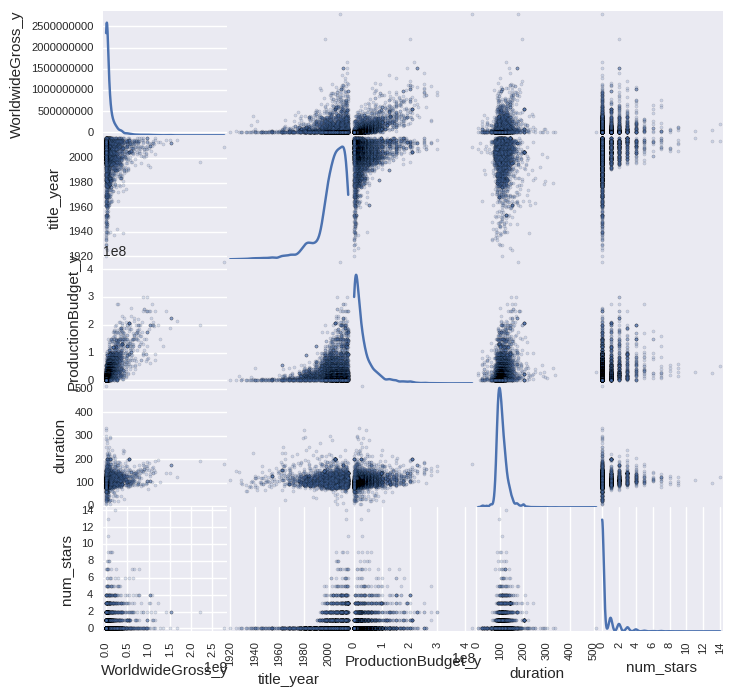

In [137]:
scatter_matrix(movies[['WorldwideGross_y','title_year','ProductionBudget_y','duration','num_stars']],
               alpha=0.2, figsize=(8, 8), diagonal='kde');

In [138]:
X2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3182 entries, 0 to 4807
Data columns (total 11 columns):
duration                3182 non-null float64
title_year              3182 non-null float64
num_stars               3182 non-null int64
dum_ Black and White    3182 non-null float64
dum_G                   3182 non-null float64
dum_NC-17               3182 non-null float64
dum_Not Rated           3182 non-null float64
dum_PG                  3182 non-null float64
dum_PG-13               3182 non-null float64
dum_R                   3182 non-null float64
Intercept               3182 non-null float64
dtypes: float64(10), int64(1)
memory usage: 298.3 KB


In [139]:
print(len(y))
print(type(y))
print(len(y2))
print(type(y2))

3182
<class 'pandas.core.series.Series'>
3182
<class 'pandas.core.series.Series'>


In [99]:
pred = X2.copy()
pred['ln_rate_of_return'] = y2
pred['rate_of_return'] = np.exp(y2)
pred['pred_ln_rate_of_return'] = pred['duration']*0.0103 + pred['dum_PG']*1.6714 + pred['dum_PG-13']*1.3387 + \
pred['dum_R']*0.8757 - 1.9371
pred['pred_rate_of_return'] = np.exp(pred['pred_ln_rate_of_return'])


In [100]:
pred.describe()

,duration,title_year,num_stars,dum_ Black and White,dum_NC-17,dum_Not Rated,dum_PG,dum_PG-13,dum_R,dum_Unrated,Intercept,ln_rate_of_return,rate_of_return,pred_ln_rate_of_return,pred_rate_of_return
count,3182.000000,3182.000000,3182.000000,3182.000000,3182.000000,3182.000000,3182.000000,3182.000000,3182.000000,3182.000000,3182.0,3182.000000,3182.000000,3182.000000,3182.000000
mean,108.800630,2008.086738,0.553740,0.024513,0.000943,0.017913,0.134192,0.386549,0.411062,0.007228,1.0,0.261588,4.178478,0.285276,1.477161
std,21.492465,4.708079,1.231759,0.154659,0.030695,0.132657,0.340912,0.487035,0.492104,0.084724,0.0,1.798859,15.401137,0.479733,0.676717
min,7.000000,2000.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,-8.983567,0.000125,-1.865000,0.154896
25%,95.000000,2004.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,-0.331244,0.718030,-0.010800,0.989258
50%,105.000000,2008.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,0.617248,1.853819,0.349200,1.417933
75%,118.000000,2012.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.0,1.306912,3.694746,0.627300,1.872548
max,300.000000,2016.000000,14.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.0,6.067309,431.517853,2.285600,9.831583


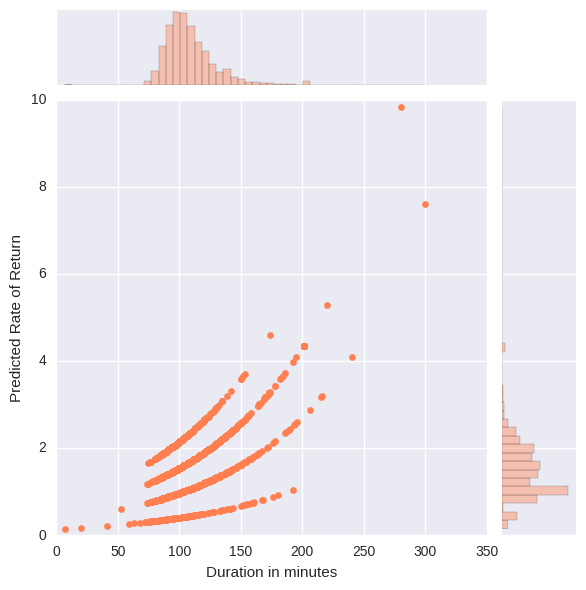

In [103]:
ax = (sns.jointplot(x="duration", y='pred_rate_of_return',  data=pred, color='coral', stat_func=None)
.set_axis_labels('Duration in minutes', 'Predicted Rate of Return'));
